In [52]:
#imports
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import io
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib
from sklearn.ensemble import RandomForestClassifier

In [2]:
#plot confusion matrix
"https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py"
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,ID,target
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,...,0,146.7,85,99,96,408,2,GA,0,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,...,0,180.6,108,135,103,415,0,OH,1,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,...,0,109.6,105,61,94,510,1,DC,2,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,...,0,134.4,122,68,121,510,3,VA,3,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,...,1,71.1,105,113,95,510,2,CA,4,0


In [5]:
#data pre-processing
train = train.drop(["State", "ID"], axis = 1)
test = test.drop(["State", "ID"], axis = 1)

In [6]:
test.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17
0,54,2.62,5.21,0,0,9.7,27.17,264.0,7,22.44,159.8,0,115.7,64,99,70,408,2
1,116,3.35,5.86,0,0,12.4,23.36,120.0,2,10.20,137.4,0,130.3,94,126,64,510,3
2,92,3.32,10.78,0,0,12.3,31.40,262.0,6,22.27,184.7,0,239.5,73,60,120,415,2
3,66,3.24,5.95,32,0,12.0,31.93,129.8,3,11.03,187.8,1,132.3,90,117,113,408,2
4,136,2.65,10.08,0,0,9.8,34.77,208.8,2,17.75,204.5,0,224.0,95,63,119,510,0


In [7]:
print("Train shape:" + str(train.shape))
print("Test shape: " + str(test.shape))

Train shape:(3000, 19)
Test shape: (333, 18)


In [8]:
train.isnull().values.any()

False

In [9]:
LABELS = ["No", "Yes"]

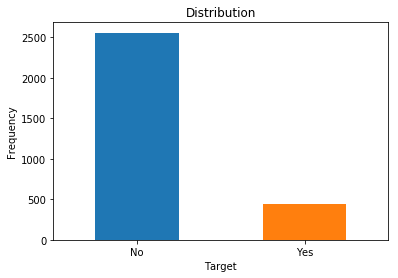

In [10]:
#distribution
count_classes = pd.value_counts(train['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Target")
plt.ylabel("Frequency");

In [11]:
yes = train[train.target == 1]
no = train[train.target == 0]
print("Yes shape: " + str(yes.shape))
print("No shape: " + str(no.shape))

Yes shape: (445, 19)
No shape: (2555, 19)


### **Random Forest**

In [53]:
#constructing Random Forest
#The choice of RF is justified as it runs fast and can deal with unbalanced data
#To validate data we split the train set (as the given test set does not have labels to check accuracy)
X_train, X_test, y_train, y_test = train_test_split(train.drop('target',axis=1),train['target'], test_size=0.30, random_state=1)
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
#probabilities 
y_pred_probs = rf.predict_proba(X_test)
# y_pred_probs[:20]

In [19]:
#The Accuracy is 94%
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       756
           1       0.92      0.69      0.79       144

   micro avg       0.94      0.94      0.94       900
   macro avg       0.93      0.84      0.88       900
weighted avg       0.94      0.94      0.94       900



Confusion matrix, without normalization
[[747   9]
 [ 45  99]]


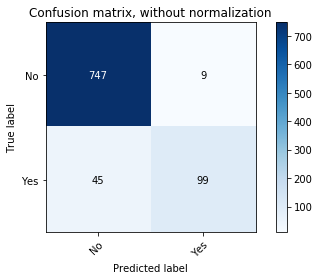

In [26]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred, np.array(["No", "Yes"]), title='Confusion matrix, without normalization')

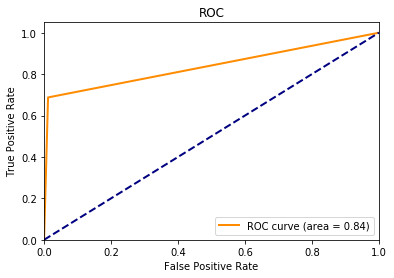

In [27]:
#ROC Curve
#AUC is 0.84, the close to 1 the better
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

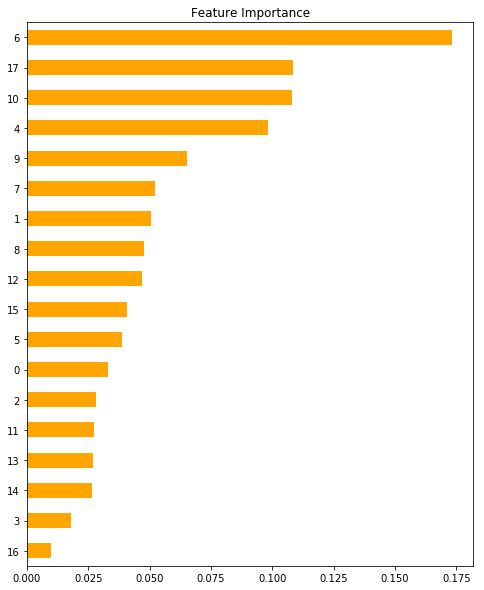

In [28]:
#Understanding which varibales are more important
importances = rf.feature_importances_
imp_coef = pd.Series(importances).sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", color = "orange")
plt.title("Feature Importance")

In [0]:
#test = test.drop(["predicted tagret"], axis = 1)
#rf.predict(test)

In [32]:
test_pred_probs = rf.predict_proba(test)
# test_pred_probs

In [31]:
# test_pred_probs[:, 1]

In [33]:
#testing the result on the given test set
test_and_predicted_target = test
test_and_predicted_target["predicted tagret"] = pd.Series(test_pred_probs[:, 1])

In [54]:
test_and_predicted_target.sort_values(by=['predicted tagret'], ascending=False).head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,predicted tagret
269,95,1.97,8.07,0,0,7.3,45.73,233.7,4,19.86,269.0,0,179.3,120,120,61,415,2,1.0
278,134,3.32,11.11,0,0,12.3,50.32,226.4,10,19.24,296.0,0,246.8,117,93,98,510,0,0.9
180,103,2.94,7.50,36,0,10.9,14.82,169.3,5,14.39,87.2,1,166.7,110,92,80,510,6,0.9
306,132,2.40,8.63,0,0,8.9,49.50,234.2,3,19.91,291.2,0,191.7,132,104,87,408,1,0.9
9,84,2.81,7.06,0,0,10.4,47.60,202.2,4,17.19,280.0,0,156.8,90,113,103,415,0,0.9


In [37]:
#Saving the result of test set with correspoding labels
test_and_predicted_target.to_csv("test_and_predicted_target")

In [55]:
test_labels = pd.read_csv('test_and_predicted_target')
test_labels.head()

,Unnamed: 0,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,predicted tagret
0,0,54,2.62,5.21,0,0,9.7,27.17,264.0,7,22.44,159.8,0,115.7,64,99,70,408,2,0.0
1,1,116,3.35,5.86,0,0,12.4,23.36,120.0,2,10.20,137.4,0,130.3,94,126,64,510,3,0.1
2,2,92,3.32,10.78,0,0,12.3,31.40,262.0,6,22.27,184.7,0,239.5,73,60,120,415,2,0.0
3,3,66,3.24,5.95,32,0,12.0,31.93,129.8,3,11.03,187.8,1,132.3,90,117,113,408,2,0.1
4,4,136,2.65,10.08,0,0,9.8,34.77,208.8,2,17.75,204.5,0,224.0,95,63,119,510,0,0.0


### **Random Forest with 5-fold CV**

In [47]:
#we can also use cross validation to understand how the model performs on unseen data
#5-fold and 10-fold
X_k_fold = train.iloc[:, 0:18]
y_k_fold = train.iloc[:, 18]

In [48]:
scores = cross_val_score(RandomForestClassifier(), X_k_fold, y_k_fold, cv=5)

C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

In [49]:
#CI for Accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.02)


In [50]:
cv_results = cross_validate(RandomForestClassifier(), X_k_fold, y_k_fold, cv=10)

C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

In [51]:
cv_results['test_score'] 

array([0.94352159, 0.91362126, 0.93687708, 0.95348837, 0.96345515,
       0.93645485, 0.93979933, 0.94314381, 0.95652174, 0.94314381])